In [45]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data ###

### Task 2 ####

In [46]:
asthma = pd.read_csv('../data/asthma_disease_data.csv')

In [47]:
asthma

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [48]:
asthma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

Very imbalanced, assuming that this will be the target

In [116]:
diagnosis = asthma.Diagnosis.value_counts()
diagnosis

0    2268
1     124
Name: Diagnosis, dtype: int64

In [ ]:
disagnos

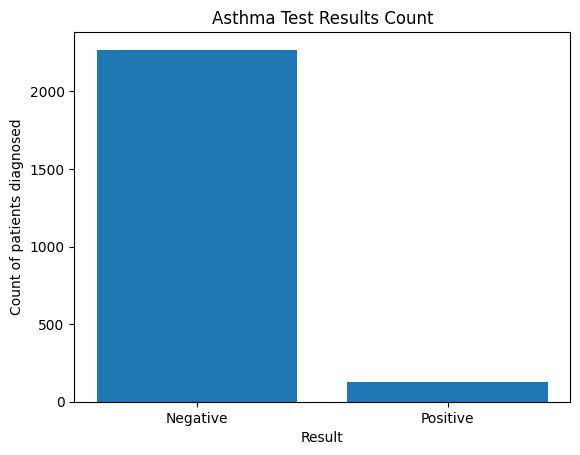

In [121]:
plt.bar([ 'Positive' if key == 1 else 'Negative' for key in diagnosis.keys()], diagnosis.values)
plt.title('Asthma Test Results Count')
plt.xlabel('Result')
plt.ylabel('Count of patients diagnosed')
plt.show()

The average age of a person with a positive diagnosis from this dataset is 40. It ranges between 5 and 79 and from the histogram below, it doesn't seem to be skewed towards one side. People of all ages can suffer from asthma (and no one is safe?).

In [90]:
asthma.loc[asthma.Diagnosis == 1, 'Age'].describe()

count    124.000000
mean      40.741935
std       22.747776
min        5.000000
25%       20.750000
50%       39.500000
75%       61.000000
max       79.000000
Name: Age, dtype: float64

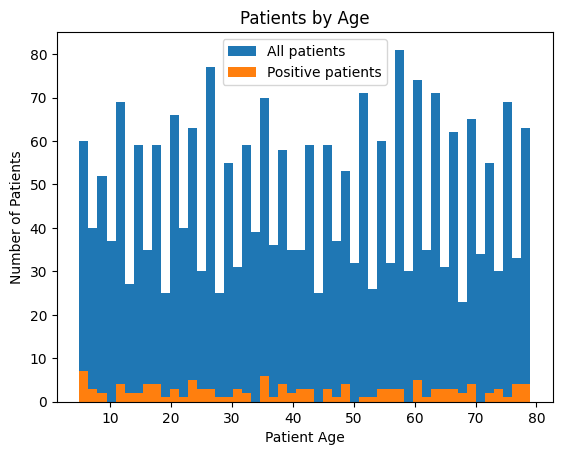

In [93]:
plt.hist(asthma.Age, bins = 50, label = 'All patients')
plt.hist(asthma.loc[asthma.Diagnosis == 1, 'Age'], bins = 50, label = 'Positive patients')
plt.xlabel('Patient Age')
plt.ylabel('Number of Patients')
plt.title('Patients by Age')
plt.legend()
plt.show()

Up close, there seems to be a spike in babies. That could be due to more babies being examined in general, however, taking a look at the histogram above, we see it is not the case, as the blue bar is not even amongst the biggest ones.

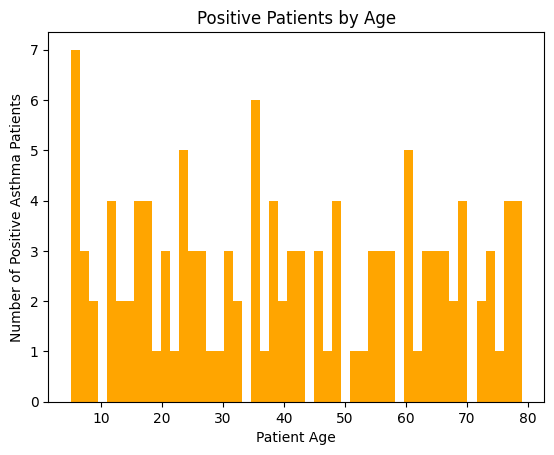

In [97]:
plt.hist(asthma.loc[asthma.Diagnosis == 1, 'Age'], bins = 50, color = 'orange')
plt.xlabel('Patient Age')
plt.ylabel('Number of Positive Asthma Patients')
plt.title('Positive Patients by Age')
plt.show()

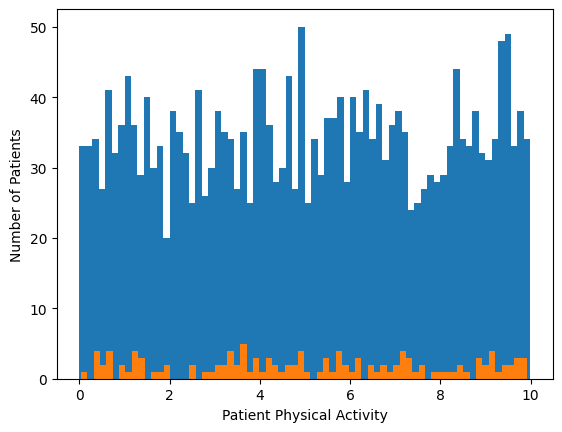

In [102]:
plt.hist(asthma.PhysicalActivity, bins = 70, label = 'All patients')
plt.hist(asthma.loc[asthma.Diagnosis == 1, 'PhysicalActivity'], bins = 70, label = 'Positive patients')
plt.xlabel('Patient Physical Activity')
plt.ylabel('Number of Patients')
plt.show()

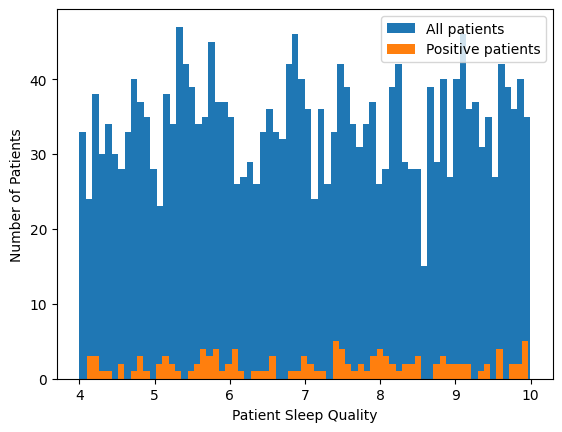

In [101]:
plt.hist(asthma.SleepQuality, bins = 70, label = 'All patients')
plt.hist(asthma.loc[asthma.Diagnosis == 1, 'SleepQuality'], bins = 70, label = 'Positive patients')
plt.xlabel('Patient Sleep Quality')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

#### Wheezing ####
Two thirds (66%) of the asthma positive patients have wheezing. In the negative patients wheezing appears in 59% of observations.

In [110]:
asthma.loc[(asthma.Wheezing == 1) & (asthma.Diagnosis == 1)].shape[0] / asthma.loc[asthma.Diagnosis == 1].shape[0]

0.6532258064516129

In [113]:
asthma.loc[(asthma.Wheezing == 1) & (asthma.Diagnosis == 0)].shape[0] / asthma.loc[asthma.Diagnosis == 0].shape[0]

0.5930335097001763

In [114]:
asthma.ExerciseInduced.value_counts()

1    1447
0     945
Name: ExerciseInduced, dtype: int64

No strong monotenous relationships

In [59]:
asthma.Smoking.value_counts()

0    2053
1     339
Name: Smoking, dtype: int64

<hr/>

There are no strong monotenous relationships between the features and the target.

In [56]:
asthma.corr(method = 'spearman')

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
PatientID,1.000000,-0.024372,0.010625,-0.029176,-0.008158,-0.001029,0.014104,0.048625,-0.017189,-0.010558,...,-0.002095,0.000516,0.036556,0.008333,-0.017940,-0.013522,-0.061486,0.013072,0.011749,0.364879
Age,-0.024372,1.000000,-0.003327,0.020395,-0.008090,0.016536,-0.009106,0.000081,0.004968,0.002471,...,0.019610,-0.007033,0.009845,0.008056,0.024431,-0.006440,0.028674,-0.026402,0.016284,-0.014865
Gender,0.010625,-0.003327,1.000000,0.015103,-0.023958,0.023790,-0.012545,0.021784,-0.015235,-0.023405,...,-0.003373,0.012846,-0.027411,-0.012716,0.020916,0.000089,-0.008273,-0.004889,0.029384,0.003128
Ethnicity,-0.029176,0.020395,0.015103,1.000000,0.000098,0.017582,-0.001080,0.040014,0.006194,-0.017363,...,-0.013776,-0.012840,0.030123,-0.007700,0.032053,-0.004021,-0.014730,0.015271,0.011583,0.014208
EducationLevel,-0.008158,-0.008090,-0.023958,0.000098,1.000000,0.005469,0.009881,-0.014071,-0.035836,0.011386,...,0.024893,-0.005565,-0.003160,0.014388,0.011563,-0.031633,-0.013734,0.001752,-0.008939,0.002486
BMI,-0.001029,0.016536,0.023790,0.017582,0.005469,1.000000,0.004960,-0.012163,-0.014648,-0.012386,...,0.010367,-0.010977,0.003295,0.045014,0.015092,-0.009531,-0.003911,-0.001381,0.012554,-0.012614
Smoking,0.014104,-0.009106,-0.012545,-0.001080,0.009881,0.004960,1.000000,0.013774,-0.027359,-0.012420,...,0.034271,0.015369,0.016194,-0.005121,-0.059075,-0.011109,-0.013507,0.014152,-0.002629,-0.019321
PhysicalActivity,0.048625,0.000081,0.021784,0.040014,-0.014071,-0.012163,0.013774,1.000000,0.050380,0.007462,...,-0.035121,0.015217,-0.029246,0.013710,-0.024510,-0.029099,0.000460,-0.010471,-0.004127,0.005208
DietQuality,-0.017189,0.004968,-0.015235,0.006194,-0.035836,-0.014648,-0.027359,0.050380,1.000000,0.014498,...,0.020995,-0.007533,-0.001552,0.039888,0.035058,0.013183,-0.013581,0.023170,-0.024056,-0.003414
SleepQuality,-0.010558,0.002471,-0.023405,-0.017363,0.011386,-0.012386,-0.012420,0.007462,0.014498,1.000000,...,-0.035837,-0.003781,0.000920,0.010981,-0.011712,-0.006911,0.015190,-0.004908,-0.026169,0.018622
